## Customer Segmentation Analysis Part 2

In [2]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [3]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [4]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
13256,14,1,0
16738,297,1,3
16454,44,2,6
14792,63,2,6
17956,249,1,12


<AxesSubplot:>

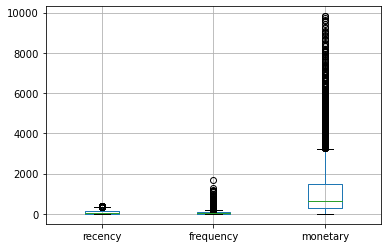

In [5]:
# Create box plots to check for outliers
rfm.boxplot()

In [6]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[0.79548532 0.66779943 0.80336162]
 [2.04159154 0.66779943 0.80133672]
 [0.49473512 0.65921664 0.79931182]
 ...
 [0.86566036 3.10004395 5.77283257]
 [0.90576039 0.34496941 5.82278006]
 [0.89573538 2.23318249 5.82345502]]


In [7]:
rfm_clean = rfm[(z < 3).all(axis=1)]

### Q. What is the purpose of the above code

We have normalized our data and about 99% of normalized data lies within 3 standard deviations, which is a z score of 3.
Essetially we are trying to get rid of outliers. 

In [8]:
rfm.shape

(3836, 3)

In [9]:
rfm_clean.shape

(3683, 3)

In [10]:
rfm_clean.head()

,recency,frequency,monetary
CustomerID,,,
13256,14,1,0
16738,297,1,3
16454,44,2,6
14792,63,2,6
17956,249,1,12


### Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

<AxesSubplot:>

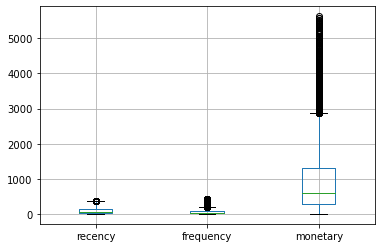

In [11]:
rfm_clean.boxplot()

There are still outliers in the cleaned data but the scale has reduced significantly.

### Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms



array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

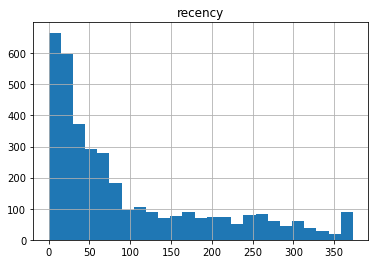

In [12]:
# Histogram for Recency Data (UK)
rfm_clean.hist(column='recency', bins=25)

The histogram for cleaned data is almost the same as the uncleaned data.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

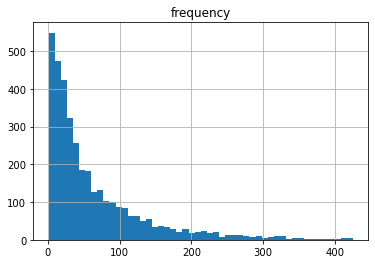

In [13]:
# Histogram for Frequency Data (UK)

rfm_clean.hist(column='frequency', bins=50)

The distribution of 'frequency' is alot clear after removing outliers. The scales are compacted to  500 instead of thousands.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

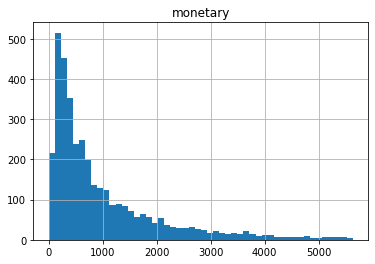

In [14]:
# Histogram for Monetary Data (UK)
rfm_clean.hist(column='monetary', bins=50)

The distribution of 'monetary' is alot clear after removing outliers. The x scale is compacted to 5000 instead of 10000 which makes the graph more easy to read.

## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [15]:
X = rfm

In [16]:
X.head()

,recency,frequency,monetary
CustomerID,,,
13256,14,1,0
16738,297,1,3
16454,44,2,6
14792,63,2,6
17956,249,1,12


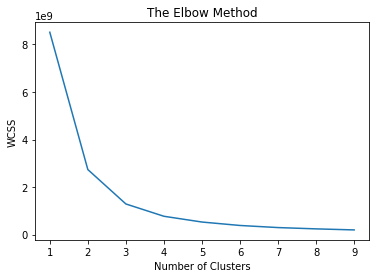

In [17]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [18]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)


In [19]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [21]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256,14,1,0,0
16738,297,1,3,0
16454,44,2,6,0
14792,63,2,6,0
17956,249,1,12,0


## Plot the graphs

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


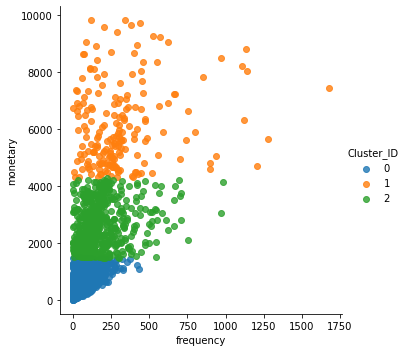

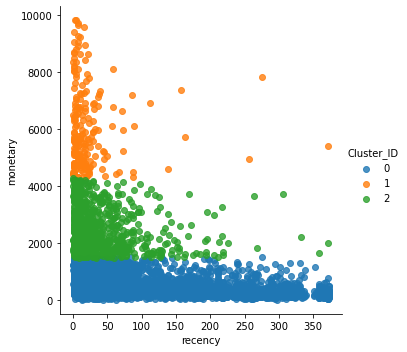

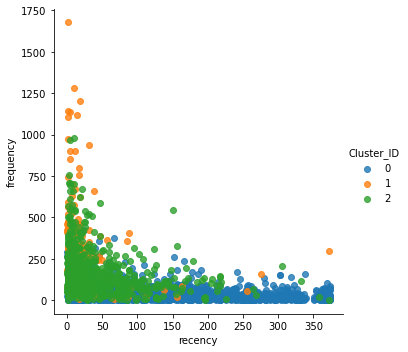

In [22]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

### Q. Comment on the plots

Cluster 0 has low monetary values, a wide range of recency and low frequency. They are at the most risk of churning. They spend less and shop less frequently
Cluster 1 has high monetary values,low recency and moderate frequency. They are good customers as they are big spenders and shop often and more recently.
Cluster 2 have moderate monetary values, low to moderate frequency and low to moderate recency. These customers need more attention.

### Q. Perform Cluster Analysis with k=4

In [23]:
kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)
rfm['Cluster_ID'] = y_kmeans

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


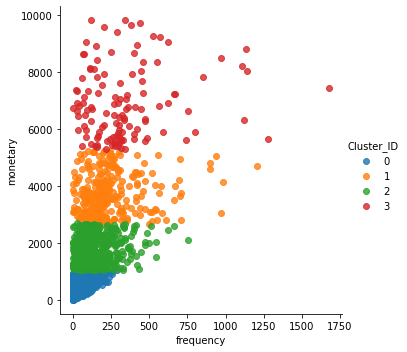

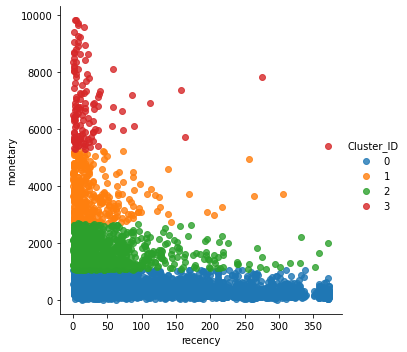

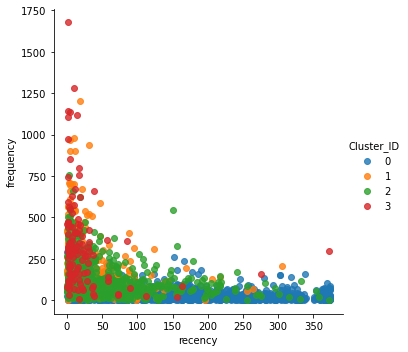

In [24]:
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

### Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

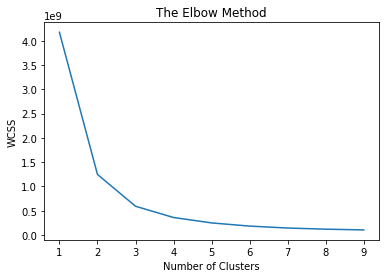

In [88]:
X1 = rfm_clean
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [102]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X1)
rfm_clean['Cluster_ID'] = y_kmeans

C:\Users\Owner\AppData\Local\Temp/ipykernel_8196/3907888854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster_ID'] = y_kmeans


C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


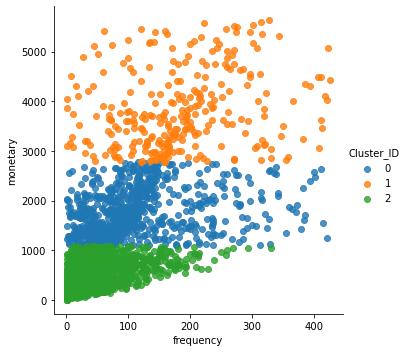

In [ ]:
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)


Cluster 0 has low monetary values i.e. less than 1000 and mostly frequency less than 200 </br>
Cluster 1 has monetary values greater than 3000 and frequnecy has a wide spread.</br>
Cluster 2 has monetary values from 1000 to 3000. and mostly frequency less than 200. 

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


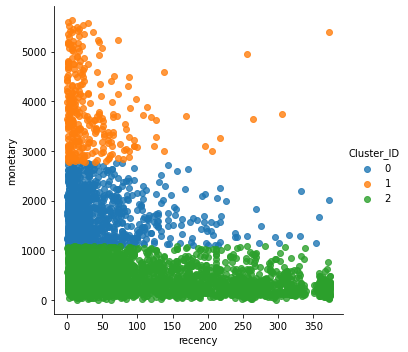

In [106]:
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)


Cluster 0 has a wide spread recency from 0 days to 350 days.</br>
Cluster 1 has very low recency from 0 to 25 while ther are outliers fro recency greater than 50..</br>
Cluster 2 has a low recency mostly betwwen 0 to 50 but there are outliers for greater than 150 . 

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


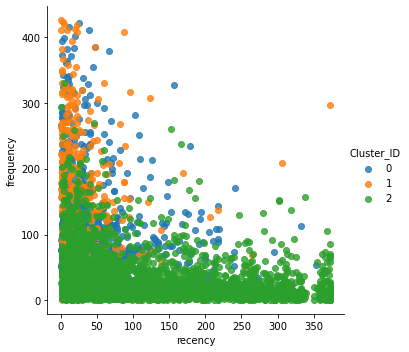

In [107]:
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Cluster 1 and Cluster 2 are better in recency than cluster 0 

In [108]:
# Calculate mean for every cluster 
for i in range(3):
    rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,48.810909,110.610909,1735.706667
1,33.534483,183.531034,3817.748276
2,118.807632,35.664720,433.883956


## Perform cluster analysis using hierarchical clustering with the cleaned rfm dataframe

In [68]:
# Import the libraries
import scipy.cluster.hierarchy as sch

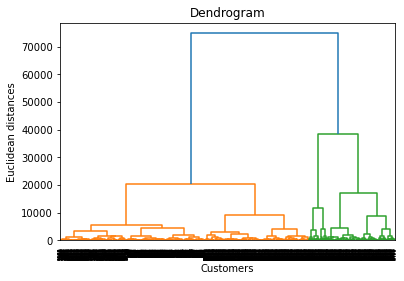

In [69]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Identify the clusters based on dendrogram

In [91]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

In [92]:
X1['Cluster_ID'] = y_hc

C:\Users\Owner\AppData\Local\Temp/ipykernel_8196/358810804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Cluster_ID'] = y_hc


In [93]:
X1.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256,14,1,0,1
16738,297,1,3,1
16454,44,2,6,1
14792,63,2,6,1
17956,249,1,12,1


### Q. Create all the three plots again. Do you observe any differences from k-means clustering method

There are 2 clusters instead of 3

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


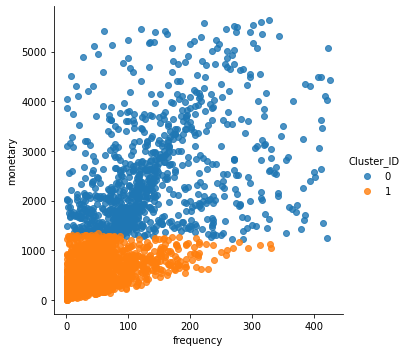

In [94]:
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)


Cluster 0 has higher monetary values than cluster 1. Both the clusters have frequency mostly less than 200 but there are outliers 

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


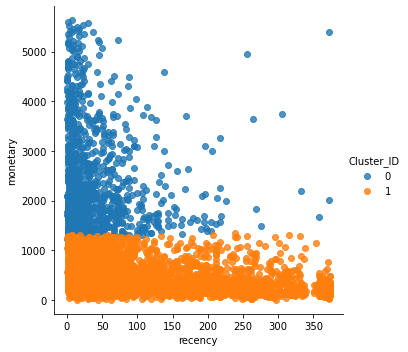

In [95]:
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Cluster 0 has lower recency than cluster 1, mostly less than 100. Cluster 1 has a wide range of recency from 0 to 350.

C:\Users\Owner\anaconda3\envs\DAB303\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


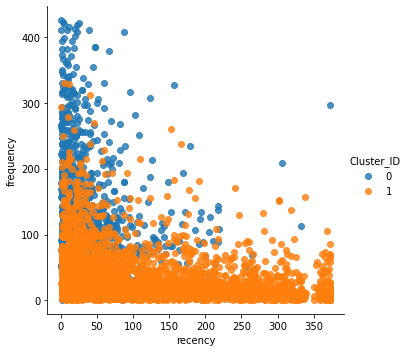

In [96]:
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Cluster 0 define good/loyal customers while cluster 1 are customers that are risky or need attention.

In [97]:
for i in range(3):
    rfm_clean_mean= X1.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,41.078556,139.638004,2477.563694
1,115.430865,38.134258,481.376870


## Evaluate Clustering 


In [49]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [83]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X1)

  silhouette_avg = metrics.silhouette_score(X1, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

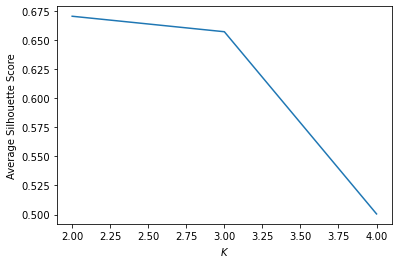

In [99]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()

The avg silhouette score is highest for 2 clusters in k means clustering, for our dataset rfm_clean.